# 1. Outliers

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('Car details v3.csv')

In [34]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<AxesSubplot:>

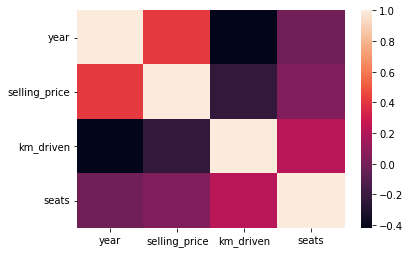

In [35]:
sns.heatmap(df.corr())

In [36]:
df.corr()['selling_price'].sort_values(ascending=False)

selling_price    1.000000
year             0.414092
seats            0.041358
km_driven       -0.225534
Name: selling_price, dtype: float64

/home/filip/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

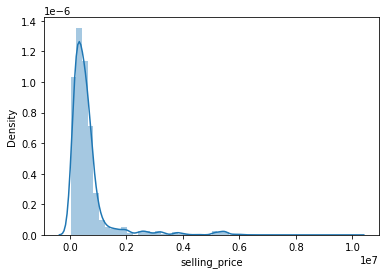

In [37]:
sns.distplot(df['selling_price'])

##### Na wykresie widać skośność prawostronną, co oznacza, że w zbiorze danych przeważają samochody o cenie niższej niż średnia.

<AxesSubplot:xlabel='year', ylabel='selling_price'>

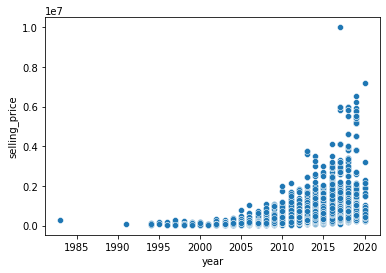

In [38]:
sns.scatterplot(x="year", y="selling_price", data=df)

In [39]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [40]:
df[df['selling_price'] > 0.8 * 10**7]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0


In [41]:
df[df['year'] < 1985]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
316,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN


In [42]:
index_drop = [ df[df['selling_price'] > 0.8 * 10**7].index[0], df[df['year'] < 1985].index[0] ]

In [43]:
index_drop

[170, 316]

In [44]:
len(df)

8128

In [45]:
len(df.drop(index_drop, axis=0))

8126

In [46]:
df = df.drop(index_drop, axis=0)

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

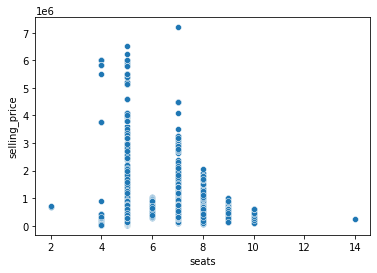

In [47]:
sns.scatterplot(x="seats", y ="selling_price", data=df)

In [48]:
df[df['seats'] == 2]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5900,Mahindra Bolero Pik-Up FB 1.7T,2020,679000,5000,Diesel,Individual,Manual,First Owner,0.0 kmpl,2523 CC,70 bhp,200Nm@ 1400-2200rpm,2.0
6629,Mahindra Bolero Pik-Up CBC 1.7T,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.0 kmpl,2523 CC,70 bhp,200Nm@ 1400-2200rpm,2.0


In [49]:
df[(df['seats'] == 7) & (df['selling_price'] > 7 * 10 ** 6)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2938,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38 kmpl,2993 CC,265 bhp,620Nm@ 1500-2500rpm,7.0


In [50]:
df[(df['seats'] == 14)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4575,Tata Winger Deluxe - Flat Roof (Non-AC),2010,235000,50000,Diesel,Individual,Manual,First Owner,10.71 kmpl,1948 CC,90 bhp,190Nm@ 2000-3000rpm,14.0


In [51]:
index_drop2 = [ df[df['seats'] == 2].index[0], df[df['seats'] == 2].index[1], df[(df['seats'] == 7) & (df['selling_price'] > 7 * 10 ** 6)].index[0], df[(df['seats'] == 14)].index[0]]
index_drop2

[5900, 6629, 2938, 4575]

In [52]:
df = df.drop(index=index_drop2, axis=0)

In [53]:
len(df)

8122

In [54]:
df.reset_index(inplace=True, drop=True)

In [55]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# 2. Missing Data

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8122 entries, 0 to 8121
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8122 non-null   object 
 1   year           8122 non-null   int64  
 2   selling_price  8122 non-null   int64  
 3   km_driven      8122 non-null   int64  
 4   fuel           8122 non-null   object 
 5   seller_type    8122 non-null   object 
 6   transmission   8122 non-null   object 
 7   owner          8122 non-null   object 
 8   mileage        7902 non-null   object 
 9   engine         7902 non-null   object 
 10  max_power      7908 non-null   object 
 11  torque         7901 non-null   object 
 12  seats          7902 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.0+ KB


In [57]:
df = df.drop('torque', axis = 1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8122 entries, 0 to 8121
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8122 non-null   object 
 1   year           8122 non-null   int64  
 2   selling_price  8122 non-null   int64  
 3   km_driven      8122 non-null   int64  
 4   fuel           8122 non-null   object 
 5   seller_type    8122 non-null   object 
 6   transmission   8122 non-null   object 
 7   owner          8122 non-null   object 
 8   mileage        7902 non-null   object 
 9   engine         7902 non-null   object 
 10  max_power      7908 non-null   object 
 11  seats          7902 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 761.6+ KB


In [59]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          220
engine           220
max_power        214
seats            220
dtype: int64

In [60]:
100 * df.isnull().sum() / len(df)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.708692
engine           2.708692
max_power        2.634819
seats            2.708692
dtype: float64

In [61]:
def percent_missing(df):
    missing = 100 * df.isnull().sum() / len(df)
    return missing[missing > 0].sort_values()

In [63]:
missing_col_values = percent_missing(df)

<AxesSubplot:>

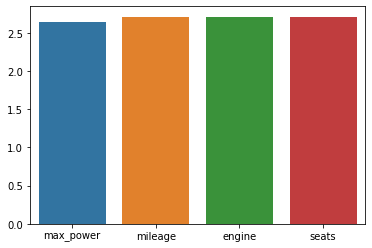

In [64]:
sns.barplot(x=missing_col_values.index, y=missing_col_values)

In [65]:
df[df['max_power'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7840,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
7990,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8003,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8062,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN


In [66]:
len(df) - len(df.dropna(axis=0, subset=['max_power']))

214

In [67]:
df = df.dropna(axis=0, subset=['max_power'])


In [68]:
missing_col_values2 = percent_missing(df)


<AxesSubplot:>

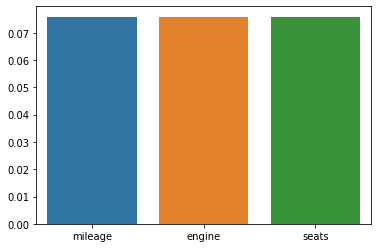

In [69]:
sns.barplot(x=missing_col_values2.index, y=missing_col_values2)

In [70]:
df[df['mileage'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
573,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN
574,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN
1440,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN
1441,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN
2547,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN
2548,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN


In [71]:
df = df.dropna(axis=0, subset=['mileage'])

In [72]:
missing_col_values3 = percent_missing(df)
missing_col_values3


Series([], dtype: float64)

In [73]:
df.describe()

,year,selling_price,km_driven,seats
count,7902.000000,7.902000e+03,7.902000e+03,7902.000000
mean,2013.980132,6.477691e+05,6.921482e+04,5.416477
std,3.865867,8.035987e+05,5.679629e+04,0.953174
min,1994.000000,2.999900e+04,1.000000e+00,4.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.600000e+04,5.000000
max,2020.000000,6.523000e+06,2.360457e+06,10.000000


# 3. Categorical Values

In [74]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902 entries, 0 to 8121
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7902 non-null   object 
 1   year           7902 non-null   int64  
 2   selling_price  7902 non-null   int64  
 3   km_driven      7902 non-null   int64  
 4   fuel           7902 non-null   object 
 5   seller_type    7902 non-null   object 
 6   transmission   7902 non-null   object 
 7   owner          7902 non-null   object 
 8   mileage        7902 non-null   object 
 9   engine         7902 non-null   object 
 10  max_power      7902 non-null   object 
 11  seats          7902 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 802.5+ KB


In [76]:
df['year'].value_counts()

2017    1009
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     582
2011     570
2010     374
2009     231
2008     201
2007     173
2006     102
2005      76
2020      72
2004      51
2003      37
2002      19
2000      16
1999      14
1997       9
1998       9
2001       6
1994       2
1996       2
1995       1
Name: year, dtype: int64

In [77]:
def categorize_year(row):
    if row['year'] >= 1994 and row['year'] < 2000:
        return '1994 - 1999'
    elif row['year'] >= 2000 and row['year']< 2006:
        return '2001 - 2005'
    elif row['year'] >= 2006 and row['year'] < 2011:
        return '2006 - 2010'
    elif row['year'] >= 2011 and row['year'] < 2016:
        return '2011 - 2015'
    elif row['year'] >= 2016 and row['year'] < 2021:
        return '2016 - 2020'
    else:
        return 'newer then 2020'

In [78]:
df['year_cat'] = df.apply(lambda row: categorize_year(row), axis=1)

In [79]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,year_cat
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,2011 - 2015
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,2011 - 2015
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,2006 - 2010
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,2006 - 2010
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,2006 - 2010


In [80]:
# 17.12.2022 1 Indian Rupee = 0.012 USD
df['selling_price'].apply(lambda x: x * 0.012)

0       5400.0
1       4440.0
2       1896.0
3       2700.0
4       1560.0
         ...  
8117    3840.0
8118    1620.0
8119    4584.0
8120    3480.0
8121    3480.0
Name: selling_price, Length: 7902, dtype: float64

In [81]:
df['selling_price_USD'] = df['selling_price'].apply(lambda x: x * 0.012)

In [82]:
len(df) - (df['mileage'].str.contains(' ') == True).sum()

0

In [83]:
df['mileage'].apply(lambda x: float(x.split(' ')[0]))

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8117    18.50
8118    16.80
8119    19.30
8120    23.57
8121    23.57
Name: mileage, Length: 7902, dtype: float64

In [84]:
#km per litre
df['mileage_kmpl'] = df['mileage'].apply(lambda x: float(x.split(' ')[0]))

In [85]:
len(df) - (df['max_power'].str.contains(' ') == True).sum()

0

In [86]:
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8117     82.85 bhp
8118       110 bhp
8119      73.9 bhp
8120        70 bhp
8121        70 bhp
Name: max_power, Length: 7902, dtype: object

In [87]:
# bhp = brake horsepower
def convert_max_power(x):
    try:
        return float(x.split(' ')[0])
    except:
        print(x)
    return 0.0
df['max_power'].apply(convert_max_power)

 bhp


0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8117     82.85
8118    110.00
8119     73.90
8120     70.00
8121     70.00
Name: max_power, Length: 7902, dtype: float64

In [88]:
df[df['max_power'] == ' bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,year_cat,selling_price_USD,mileage_kmpl
4929,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796 CC,bhp,8.0,2001 - 2005,960.0,10.9


In [89]:
df.loc[df[df['max_power'] == ' bhp'].index,'max_power'] = '35 bhp'

In [90]:
df['max_power_bhp'] = df['max_power'].apply(lambda x: float(x.split(' ')[0]))

In [91]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,year_cat,selling_price_USD,mileage_kmpl,max_power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,2011 - 2015,5400.0,23.40,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,2011 - 2015,4440.0,21.14,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,2006 - 2010,1896.0,17.70,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,2006 - 2010,2700.0,23.00,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,2006 - 2010,1560.0,16.10,88.20


In [92]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

In [93]:
df['engine_CC'] = df['engine'].apply(lambda x: int(x.split(' ')[0]))

In [94]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,year_cat,selling_price_USD,mileage_kmpl,max_power_bhp,engine_CC
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,2011 - 2015,5400.0,23.40,74.00,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,2011 - 2015,4440.0,21.14,103.52,1498
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,2006 - 2010,1896.0,17.70,78.00,1497
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,2006 - 2010,2700.0,23.00,90.00,1396
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,2006 - 2010,1560.0,16.10,88.20,1298


In [95]:
drop_cols = ['mileage', 'engine', 'max_power', 'year', 'selling_price']

In [96]:
df = df.drop(columns=drop_cols, axis=1)

In [97]:
df.head()

,name,km_driven,fuel,seller_type,transmission,owner,seats,year_cat,selling_price_USD,mileage_kmpl,max_power_bhp,engine_CC
0,Maruti Swift Dzire VDI,145500,Diesel,Individual,Manual,First Owner,5.0,2011 - 2015,5400.0,23.40,74.00,1248
1,Skoda Rapid 1.5 TDI Ambition,120000,Diesel,Individual,Manual,Second Owner,5.0,2011 - 2015,4440.0,21.14,103.52,1498
2,Honda City 2017-2020 EXi,140000,Petrol,Individual,Manual,Third Owner,5.0,2006 - 2010,1896.0,17.70,78.00,1497
3,Hyundai i20 Sportz Diesel,127000,Diesel,Individual,Manual,First Owner,5.0,2006 - 2010,2700.0,23.00,90.00,1396
4,Maruti Swift VXI BSIII,120000,Petrol,Individual,Manual,First Owner,5.0,2006 - 2010,1560.0,16.10,88.20,1298


In [98]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [99]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [100]:
df.seller_type.value_counts()

Individual          6559
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [101]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [102]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [103]:
df.seats.unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10.])

In [104]:
df['seats'] = df.seats.apply(lambda x: int(x))

In [105]:
df.year_cat.unique()

array(['2011 - 2015', '2006 - 2010', '2016 - 2020', '2001 - 2005',
       '1994 - 1999'], dtype=object)

In [106]:
df.head()

,name,km_driven,fuel,seller_type,transmission,owner,seats,year_cat,selling_price_USD,mileage_kmpl,max_power_bhp,engine_CC
0,Maruti Swift Dzire VDI,145500,Diesel,Individual,Manual,First Owner,5,2011 - 2015,5400.0,23.40,74.00,1248
1,Skoda Rapid 1.5 TDI Ambition,120000,Diesel,Individual,Manual,Second Owner,5,2011 - 2015,4440.0,21.14,103.52,1498
2,Honda City 2017-2020 EXi,140000,Petrol,Individual,Manual,Third Owner,5,2006 - 2010,1896.0,17.70,78.00,1497
3,Hyundai i20 Sportz Diesel,127000,Diesel,Individual,Manual,First Owner,5,2006 - 2010,2700.0,23.00,90.00,1396
4,Maruti Swift VXI BSIII,120000,Petrol,Individual,Manual,First Owner,5,2006 - 2010,1560.0,16.10,88.20,1298


In [107]:
df = df.drop('name', axis=1)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902 entries, 0 to 8121
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   km_driven          7902 non-null   int64  
 1   fuel               7902 non-null   object 
 2   seller_type        7902 non-null   object 
 3   transmission       7902 non-null   object 
 4   owner              7902 non-null   object 
 5   seats              7902 non-null   int64  
 6   year_cat           7902 non-null   object 
 7   selling_price_USD  7902 non-null   float64
 8   mileage_kmpl       7902 non-null   float64
 9   max_power_bhp      7902 non-null   float64
 10  engine_CC          7902 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.0+ MB


In [109]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [110]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902 entries, 0 to 8121
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   km_driven          7902 non-null   int64  
 1   seats              7902 non-null   int64  
 2   selling_price_USD  7902 non-null   float64
 3   mileage_kmpl       7902 non-null   float64
 4   max_power_bhp      7902 non-null   float64
 5   engine_CC          7902 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 752.1 KB


In [111]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902 entries, 0 to 8121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fuel          7902 non-null   object
 1   seller_type   7902 non-null   object
 2   transmission  7902 non-null   object
 3   owner         7902 non-null   object
 4   year_cat      7902 non-null   object
dtypes: object(5)
memory usage: 690.4+ KB


#### Converting

In [112]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [113]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [114]:
final_df

,km_driven,seats,selling_price_USD,mileage_kmpl,max_power_bhp,engine_CC,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,year_cat_2001 - 2005,year_cat_2006 - 2010,year_cat_2011 - 2015,year_cat_2016 - 2020
0,145500,5,5400.0,23.40,74.00,1248,1,0,0,1,0,1,0,0,0,0,0,0,1,0
1,120000,5,4440.0,21.14,103.52,1498,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,140000,5,1896.0,17.70,78.00,1497,0,0,1,1,0,1,0,0,0,1,0,1,0,0
3,127000,5,2700.0,23.00,90.00,1396,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,120000,5,1560.0,16.10,88.20,1298,0,0,1,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,110000,5,3840.0,18.50,82.85,1197,0,0,1,1,0,1,0,0,0,0,0,0,1,0
8118,119000,5,1620.0,16.80,110.00,1493,1,0,0,1,0,1,1,0,0,0,0,1,0,0
8119,120000,5,4584.0,19.30,73.90,1248,1,0,0,1,0,1,0,0,0,0,0,1,0,0
8120,25000,5,3480.0,23.57,70.00,1396,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [116]:
final_df.reset_index(inplace=True, drop=True)

In [117]:
final_df

,km_driven,seats,selling_price_USD,mileage_kmpl,max_power_bhp,engine_CC,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,year_cat_2001 - 2005,year_cat_2006 - 2010,year_cat_2011 - 2015,year_cat_2016 - 2020
0,145500,5,5400.0,23.40,74.00,1248,1,0,0,1,0,1,0,0,0,0,0,0,1,0
1,120000,5,4440.0,21.14,103.52,1498,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,140000,5,1896.0,17.70,78.00,1497,0,0,1,1,0,1,0,0,0,1,0,1,0,0
3,127000,5,2700.0,23.00,90.00,1396,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,120000,5,1560.0,16.10,88.20,1298,0,0,1,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7897,110000,5,3840.0,18.50,82.85,1197,0,0,1,1,0,1,0,0,0,0,0,0,1,0
7898,119000,5,1620.0,16.80,110.00,1493,1,0,0,1,0,1,1,0,0,0,0,1,0,0
7899,120000,5,4584.0,19.30,73.90,1248,1,0,0,1,0,1,0,0,0,0,0,1,0,0
7900,25000,5,3480.0,23.57,70.00,1396,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [118]:
final_df.corr()['selling_price_USD'].sort_values()

transmission_Manual            -0.591844
seller_type_Individual         -0.392219
km_driven                      -0.222901
year_cat_2006 - 2010           -0.208607
fuel_Petrol                    -0.198277
year_cat_2011 - 2015           -0.196601
owner_Second Owner             -0.179755
mileage_kmpl                   -0.135133
owner_Third Owner              -0.115907
year_cat_2001 - 2005           -0.108039
owner_Fourth & Above Owner     -0.074169
fuel_LPG                       -0.036265
seller_type_Trustmark Dealer    0.033642
seats                           0.043299
owner_Test Drive Car            0.117617
fuel_Diesel                     0.208277
year_cat_2016 - 2020            0.382785
engine_CC                       0.457507
max_power_bhp                   0.746174
selling_price_USD               1.000000
Name: selling_price_USD, dtype: float64

In [119]:
final_df.to_csv('Final_DF_Cars.csv')